In [1]:
import gdsfactory as gf

define and print 2x2 MZI phase shifter (base)

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer       ┃ center          ┃ port_type  ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ o1   │ 0.5   │ 180.0       │ WG (1/0)    │ (-10.0, -0.625) │ optical    │
│ o2   │ 0.5   │ 180.0       │ WG (1/0)    │ (-10.0, 0.625)  │ optical    │
│ o4   │ 0.5   │ 0.0         │ WG (1/0)    │ (91.0, -0.625)  │ optical    │
│ o3   │ 0.5   │ 0.0         │ WG (1/0)    │ (91.0, 0.625)   │ optical    │
│ e1   │ 11.0  │ 180.0       │ MTOP (49/0) │ (19.6, 22.625)  │ electrical │
│ e3   │ 11.0  │ 90.0        │ MTOP (49/0) │ (25.1, 28.125)  │ electrical │
│ e6   │ 11.0  │ 0.0         │ MTOP (49/0) │ (30.6, 22.625)  │ electrical │
│ e8   │ 11.0  │ 270.0       │ MTOP (49/0) │ (25.1, 17.125)  │ electrical │
│ e2   │ 11.0  │ 180.0       │ MTOP (49/0) │ (50.4, 22.625)  │ electrical │
│ e4   │ 11.0  │ 90.0        │ MTOP (49/0) │ (55.9, 28.125)  │ electrical │
│ e5   │ 11.0  │ 0.0         │ MTOP (49/0) │ (61.4, 22.625)  │ electrical │
│ e7   │ 11.0  │ 270.0       │ MTOP (49/0) │ (55.9, 17.125)  │ electrical │
└──────┴───────┴─────────────┴─────────────┴─────────────────┴────────────┘

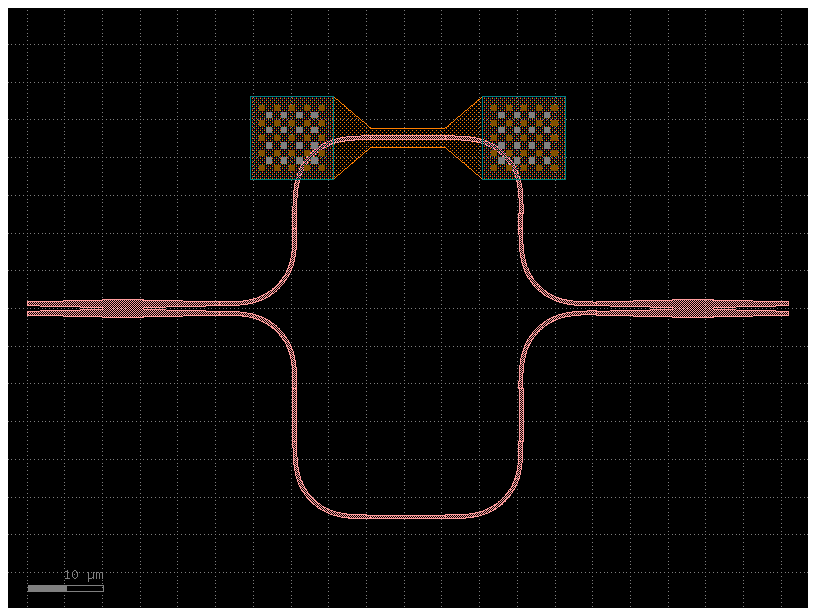

In [2]:
mziBase = gf.components.mzi2x2_2x2_phase_shifter(delta_length=10, length_y=2, length_x=10, bend='bend_euler', straight='straight', straight_x_top='straight_heater_metal', splitter='mmi2x2', combiner='mmi2x2', with_splitter=True, port_e1_splitter='o3', port_e0_splitter='o4', port_e1_combiner='o3', port_e0_combiner='o4', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()

mziBase.pprint_ports()

mziBase.plot()

define and print s-bend

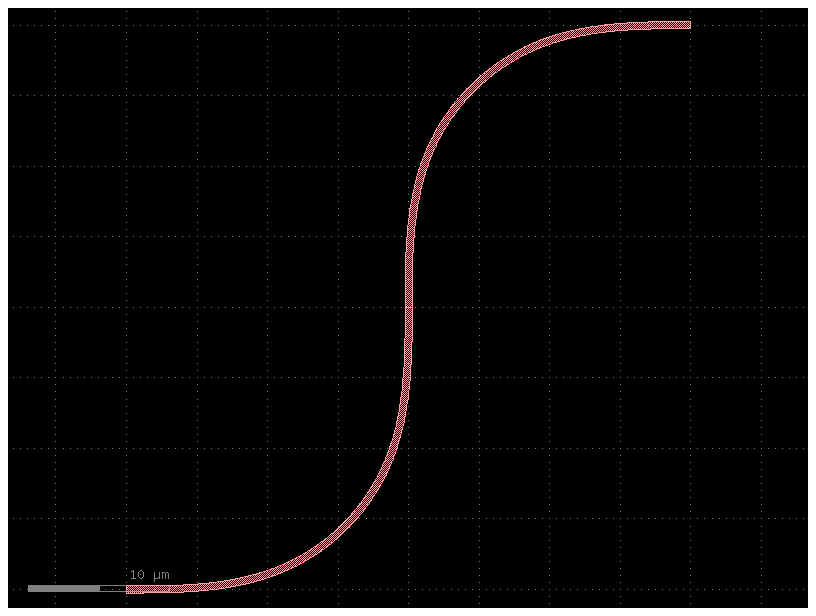

In [3]:
bendS = gf.components.bend_euler_s(radius=20,p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

bendS.plot()

mirroring component

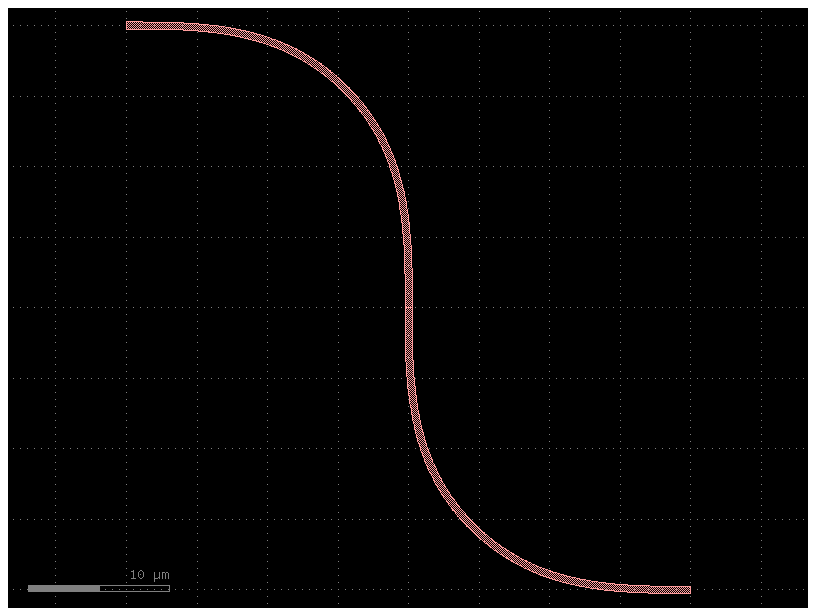

In [4]:
bendSMirror = gf.components.bend_euler_s(radius=20, p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

bendSMirror.mirror_y()

bendSMirror.plot()

connecting component (direct conenction)

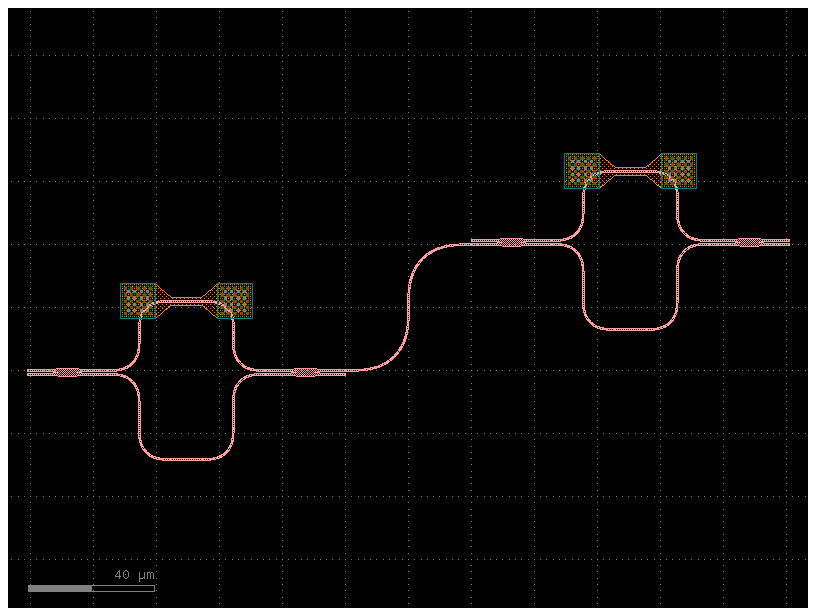

In [5]:
mziBendS = gf.Component() # defining new blank component as "mziBendS"

mziBase1 = mziBendS << mziBase # defining new mzi inside double_mzi as "mziBase1"
bendS1 = mziBendS << bendS # defining new mzi inside double_mzi as "mziBase2"
mziBase2 = mziBendS << mziBase # defining new mzi inside double_mzi as "mziBase2"

mziBase1.connect("o3", bendS1.ports["o1"]) # connecting port-"o3"-of-mziBase1 to port-"o1"-of-bendS

mziBase2.connect("o1", bendS1.ports["o2"])

mziBendS.plot()

routing component (automatically route waveguides)

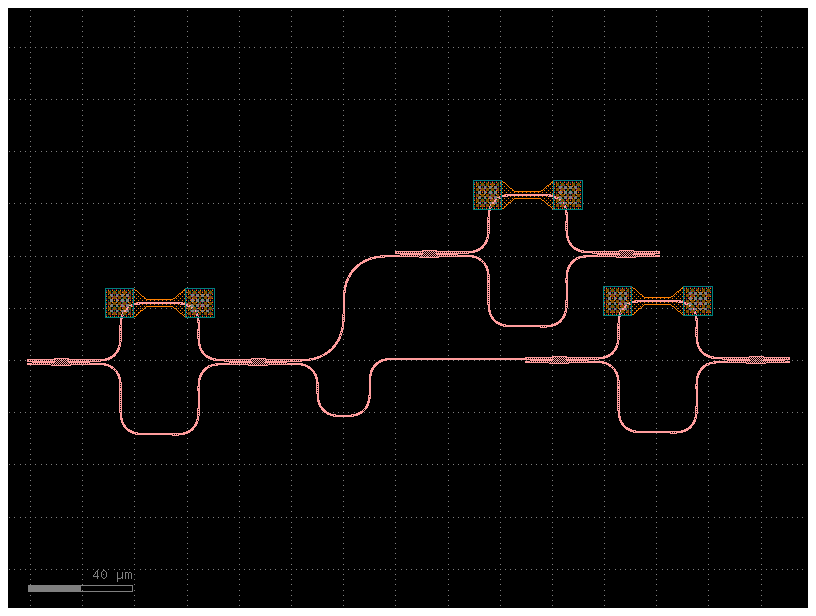

In [14]:
mziBendSMzi = gf.Component() # defining new blank component as "mziBendS"

mziBase1x = mziBendSMzi << mziBase # defining new mzi inside double_mzi as "mziBase1"
bendS1x = mziBendSMzi << bendS # defining new mzi inside double_mzi as "mziBase2"
mziBase2x = mziBendSMzi << mziBase # defining new mzi inside double_mzi as "mziBase2"

mziBase1x.connect("o3", bendS1x.ports["o1"]) # connecting port-"o3"-of-mziBase1 to port-"o1"-of-bendS

mziBase2x.connect("o1", bendS1x.ports["o2"])

mziBase3x = mziBendSMzi << mziBase
mziBase3x.movex(100)
route13 = gf.routing.route_single(
    mziBendSMzi,
    port1=mziBase1x.ports["o4"],
    port2=mziBase3x.ports["o2"],
    cross_section=gf.cross_section.strip,
)

mziBendSMzi.plot()

PDF : add heater to s-bend via stack

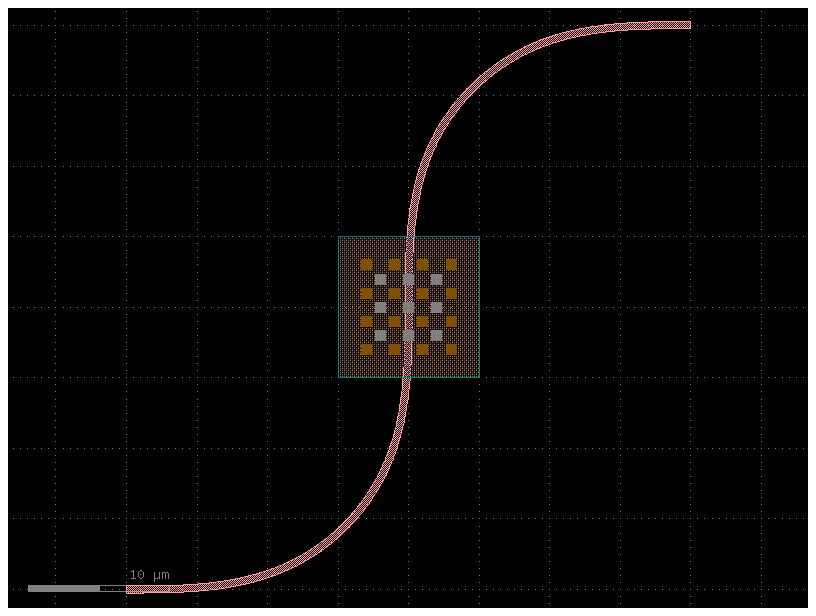

In [15]:
bend_s_heater = gf.components.bend_euler_s(radius=20,p=0.5, with_arc_floorplan=True, cross_section='strip', allow_min_radius_violation=False, port1='o1', port2='o2').copy()

heater_cell = gf.components.via_stack_heater_mtop_mini(size=(10, 10), layers=('HEATER', 'M2', 'MTOP'), correct_size=True, slot_horizontal=False, slot_vertical=False, port_orientations=(180, 90, 0, -90)).copy()

heater = bend_s_heater << heater_cell

heater.movex(20)
heater.movey(20)

bend_s_heater.plot()

routing components (if path is needed)

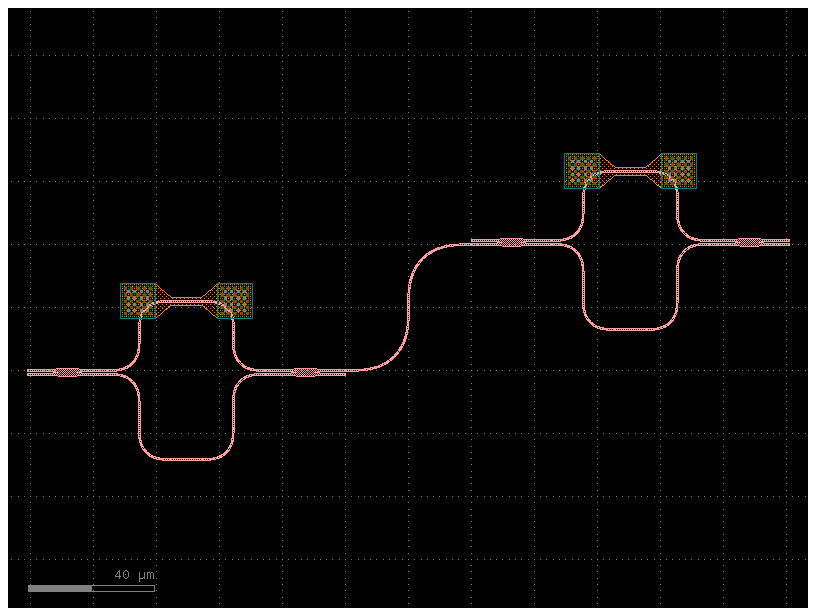

In [8]:
mziBendSMzi = gf.Component() # defining new blank component as "mziBendS"

mziBase1 = mziBendSMzi << mziBase # defining new mzi inside double_mzi as "mziBase1"
bendS1 = mziBendSMzi << bendS # defining new mzi inside double_mzi as "mziBase2"

mziBase2 = mziBendSMzi << mziBase # defining new mzi inside double_mzi as "mziBase2"

# mziBase1.connect("o3", bendS1.ports["o1"]) # connecting port-"o3"-of-mziBase1 to port-"o1"-of-bendS

route12 = gf.routing.route_single(
    mziBendSMzi,
    port1=mziBase1.ports["o4"],
    port2=mziBase2.ports["o2"],
    cross_section=gf.cross_section.strip,
)

mziBendS.plot()

custom component : mzi + 4 s-bend

┏━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ name ┃ width ┃ orientation ┃ layer    ┃ center           ┃ port_type ┃
┡━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ i1   │ 0.5   │ 180.0       │ WG (1/0) │ (-50.0, -40.625) │ optical   │
│ i2   │ 0.5   │ 180.0       │ WG (1/0) │ (-50.0, 40.625)  │ optical   │
│ o2   │ 0.5   │ 0.0         │ WG (1/0) │ (131.0, 40.625)  │ optical   │
│ o1   │ 0.5   │ 0.0         │ WG (1/0) │ (131.0, -40.625) │ optical   │
└──────┴───────┴─────────────┴──────────┴──────────────────┴───────────┘

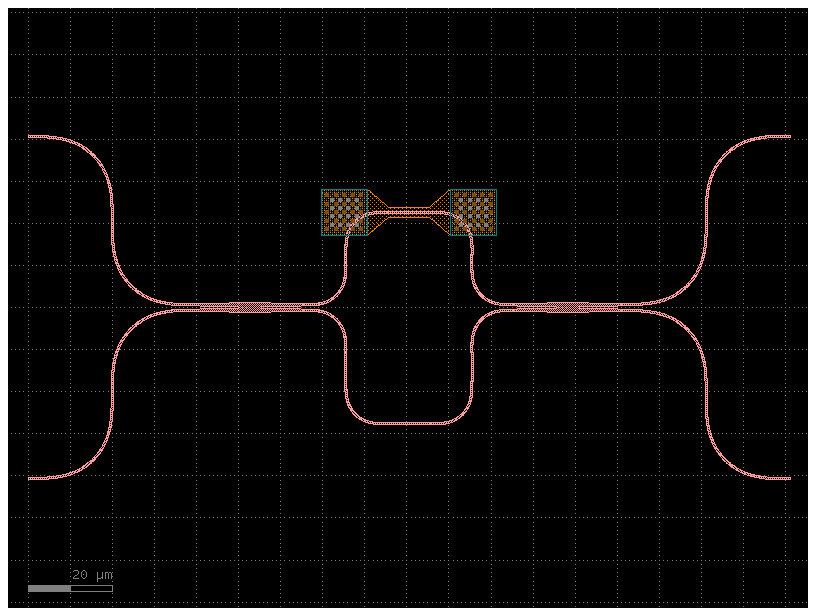

In [9]:
mzi_cell = gf.Component() # defining new "blank" component as mzi_cell

mzi1 = mzi_cell << mziBase # defining new mzi inside mzi_cell as "mzi1"

bends1 = mzi_cell << bendS # defining new s-bend
bends2 = mzi_cell << bendSMirror # defining new mirrored s-bend
bends3 = mzi_cell << bendS # defining new s-bend
bends4 = mzi_cell << bendSMirror # defining new mirrored s-bend

bends1.connect("o2", mzi1.ports["o1"]) # connecting port-"o2"-of-bends1 to port-"o1"-of-mzi1 
bends2.connect("o2", mzi1.ports["o2"], mirror=True) # connecting port-"o2"-of-bends2 to port-"o2"-of-mzi1 
bends3.connect("o1", mzi1.ports["o3"]) # connecting port-"o1"-of-bends3 to port-"o3"-of-mzi1 
bends4.connect("o1", mzi1.ports["o4"], mirror=True) # connecting port-"o1"-of-bends4 to port-"o4"-of-mzi1 

mzi_cell.add_port(name="i1", port=bends1.ports["o1"]) # defining port-"o1"-of-bends1 as port-"p1"-of-mzi_cell
mzi_cell.add_port(name="i2", port=bends2.ports["o1"]) # defining port-"o1"-of-bends2 as port-"p2"-of-mzi_cell
mzi_cell.add_port(name="o2", port=bends3.ports["o2"]) # defining port-"o2"-of-bends3 as port-"p3"-of-mzi_cell
mzi_cell.add_port(name="o1", port=bends4.ports["o2"]) # defining port-"o2"-of-bends4 as port-"p4"-of-mzi_cell

mzi_cell.plot()

mzi_cell.pprint_ports()

# define blank component "c"

# define mzi1 "mzi1_buffer"
# insert "mzi1_buffer" to "c"

# define mzi2 "mzi2_buffer"
# insert "mzi2_buffer" to "c"

print 2 mzi filter

In [10]:
c = gf.Component()

mzi1_cell = gf.components.mzi(delta_length=10, length_y=2, length_x=0.1, bend='bend_euler', straight='straight', splitter='mmi1x2', with_splitter=True, port_e1_splitter='o2', port_e0_splitter='o3', port_e1_combiner='o2', port_e0_combiner='o3', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()

mzi1 = c << mzi1_buffer

# mzi2_buffer = gf.components.mzi(delta_length=10, length_y=2, length_x=0.1, bend='bend_euler', straight='straight', splitter='mmi1x2', with_splitter=True, port_e1_splitter='o2', port_e0_splitter='o3', port_e1_combiner='o2', port_e0_combiner='o3', port1='o1', port2='o2', nbends=2, cross_section='strip', mirror_bot=False, add_optical_ports_arms=False, min_length=0.01, auto_rename_ports=True).copy()

# mzi2 = c << mzi2_buffer

# mzi2.connect("")

c.draw_ports()

c.plot()

NameError: name 'mzi1_buffer' is not defined